### 3 (a) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [2]:
df = pd.read_excel('realestate.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
linear = LinearRegression()
col = list(df.columns)
col.remove('Y house price of unit area')
col.remove('No')

In [4]:
X = df[col]
y = df['Y house price of unit area']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [6]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
predicted = linear.predict(x_test)
print('The RMS Error is',np.sqrt(mean_squared_error(predicted,y_test)))

The RMS Error is 8.57703316536859


In [8]:
linear.coef_

array([ 5.85014746e+00, -2.42551464e-01, -5.13870668e-03,  1.07453372e+00,
        2.39100477e+02, -5.22365968e+01])

### 3 (b)

No. It is not correct to infer about the important of different features. This is because all the feature values have varying ranges, and hence the coefficients are chosen to overall normalise the effect of different range of values that different features take.

### 3 (c)

In [16]:
linear_scaled = LinearRegression()
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)
linear_scaled.fit(x_train_scaled,y_train)
scaled_predicted = linear_scaled.predict(x_test_scaled)
print('The RMSE is',np.sqrt(mean_squared_error(scaled_predicted,y_test)))

The RMSE is 8.712564884272549


In [12]:
linear_scaled.coef_

array([ 1.65204522, -2.76099926, -6.40440182,  3.20557991,  2.989337  ,
       -0.78774024])

This above model that was fit, after the scaling shows us that X1,X2,X3,X4 are more important than longitude in most cases. Surprisingly the latitude (X5) plays an important role. Also, previously X3 had very low coefficients in terms of absolute values, but now, it has the highest. Therefore we can say that X4 is contributing, along with X1 and X5 towards making the prices higher, wherein, X2, X3 and X6 are contributing towards making the prices lower.

### 3 (d)

(array([ 1.,  0.,  2., 12., 32., 46., 21.,  7.,  2.,  2.]),
 array([-37.25837394, -30.62644422, -23.9945145 , -17.36258478,
        -10.73065506,  -4.09872534,   2.53320438,   9.1651341 ,
         15.79706382,  22.42899354,  29.06092326]),
 <a list of 10 Patch objects>)

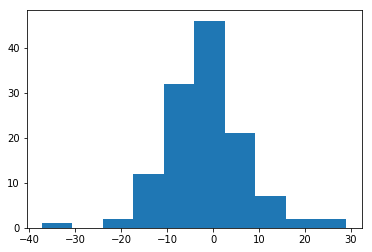

In [17]:
residual = y_test - scaled_predicted
plt.hist(residual)